## CREDIT SCORE PREDICTION ML MODELS
###  Let's create a machine learning prediction model to predict customer credit score
<p> A summary of what we see here<br>
    - Exploratory Analysis and Graphs<br>
    - Missing Data Handling <br>
    - Outlier Handling <br>
    - OneHotEncoding <br>
    - Attribute Engineering <br>
    - Data Handling <br>
    - Data Standardization <br>
    - Machine Learning Model Building, Testing and Validation

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore") 


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression # 
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [76]:
df_dados = pd.read_excel("/home/carlos/Pictures/myone/risk/data/dados_credito.xlsx")
df_dados.shape

(10476, 17)

In [38]:
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [40]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [77]:
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [78]:
df_dados.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [43]:
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [79]:
df_dados.replace('SEM DADOS',np.nan, inplace = True)

In [80]:
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].astype(np.float64)

In [81]:
df_dados.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800.0     846
2200.0     792
3100.0     792
3900.0     792
4500.0     468
4800.0     792
5300.0     522
6100.0     522
6800.0     611
9000.0     522
9800.0     468
11500.0    790
13000.0    522
15000.0    522
17500.0    522
18300.0    522
22000.0    468
dtype: int64

In [47]:
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [48]:
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].fillna((df_dados['ULTIMO_SALARIO'].median()))

In [82]:
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [50]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [51]:
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [83]:
variaveis_numericas = []
for i in df_dados.columns[0:16].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [53]:
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

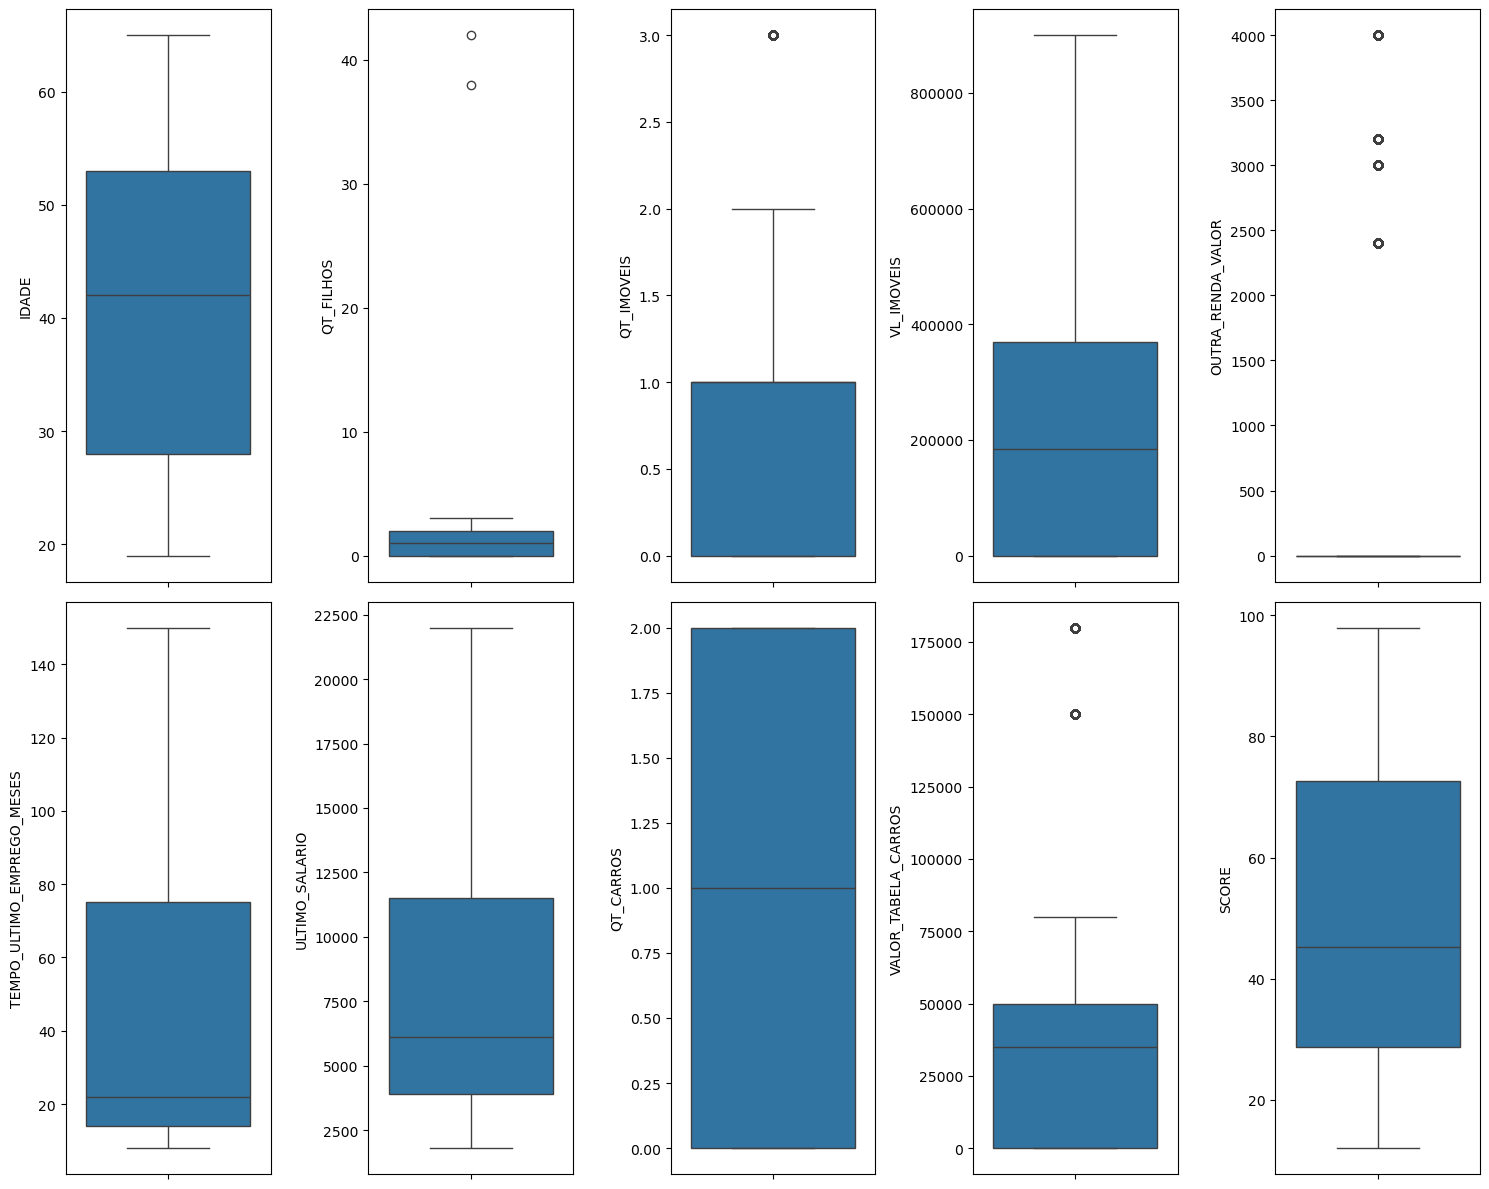

In [54]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

In [55]:
df_dados.loc[df_dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [56]:
df_dados.drop(df_dados.loc[df_dados['QT_FILHOS'] > 4].index, inplace=True)

In [57]:
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [58]:
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [59]:
df_dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

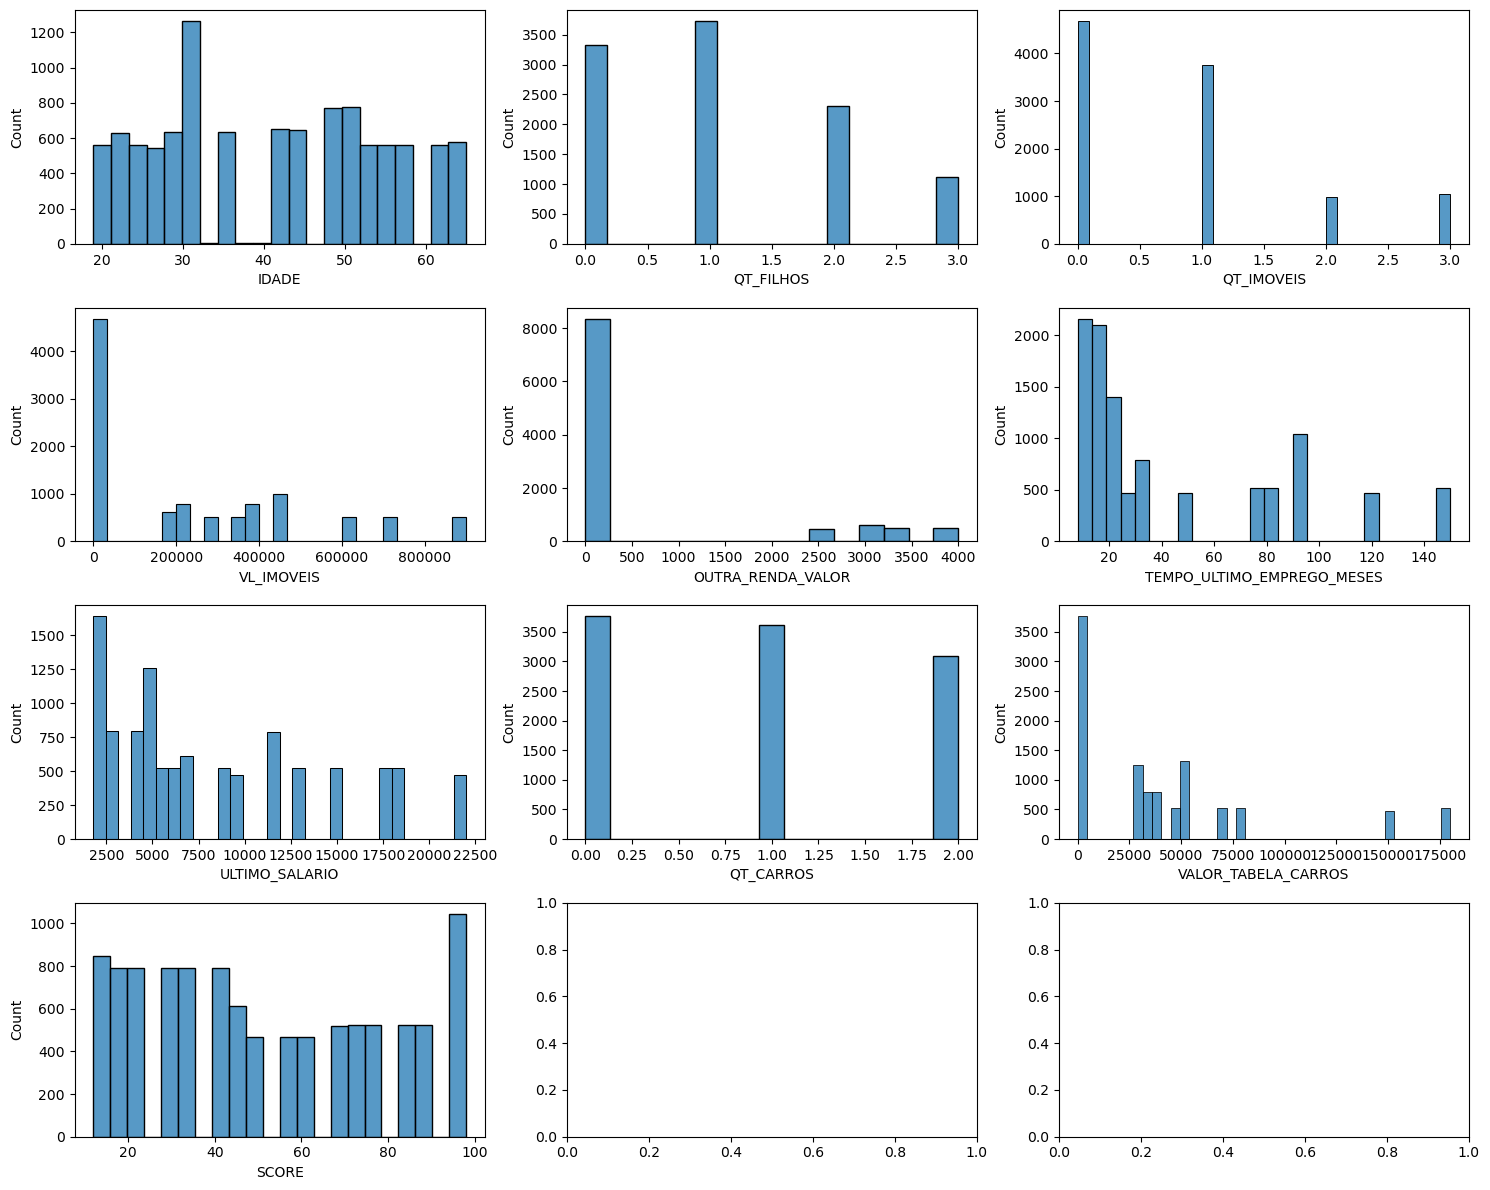

In [60]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])    
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

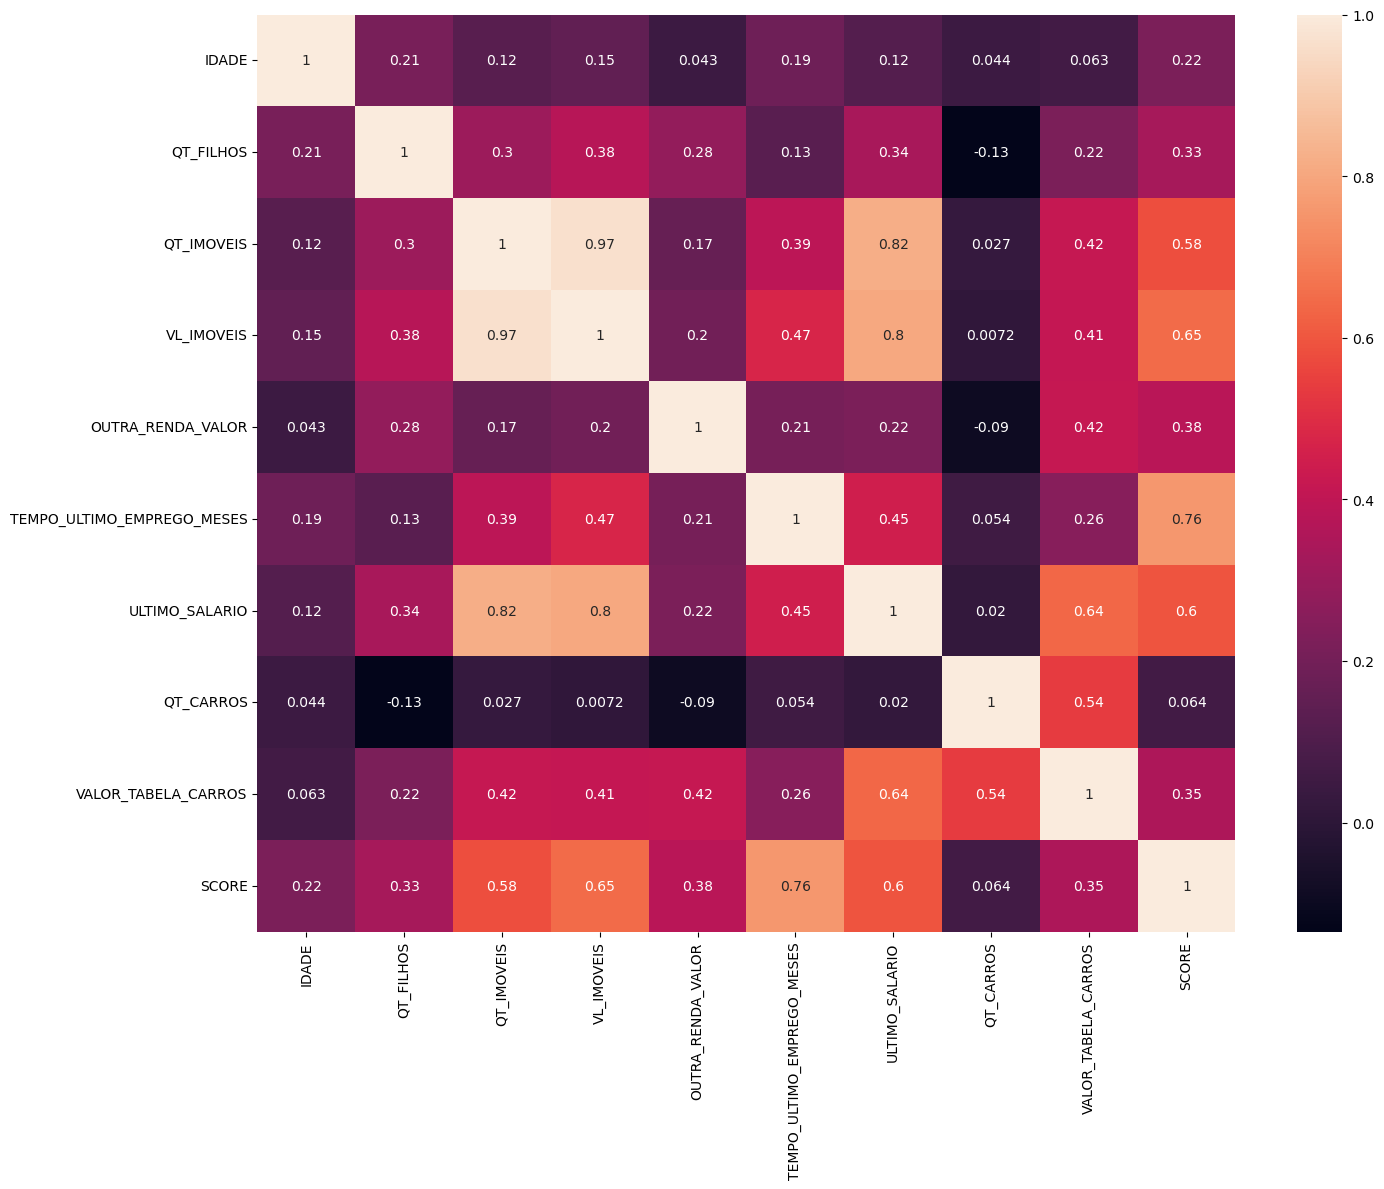

In [61]:
numeric_df = df_dados.select_dtypes(include=['number'])
ax = sns.heatmap(numeric_df.corr(), annot=True)


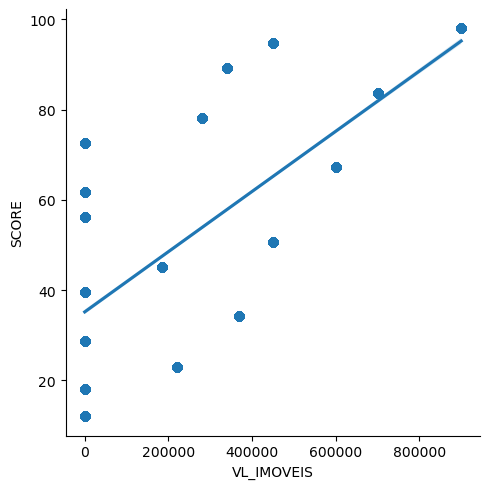

In [62]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "VL_IMOVEIS", y = "SCORE", data = df_dados)

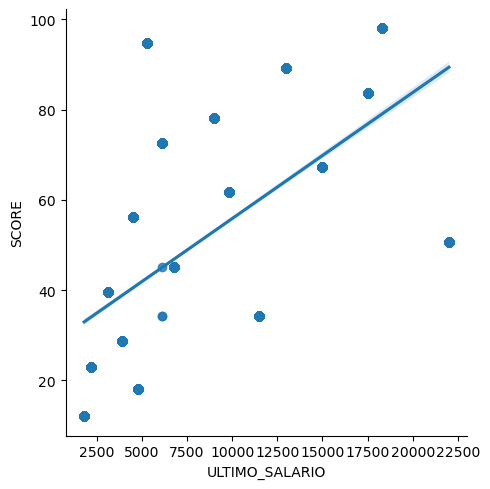

In [63]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "ULTIMO_SALARIO", y = "SCORE", data = df_dados)

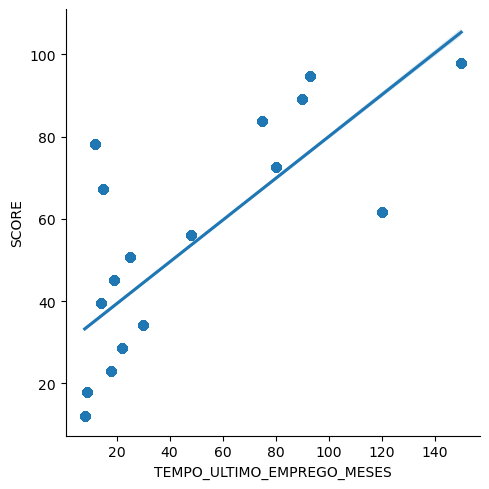

In [64]:
# Vamos observar um grafico de dispersão para avaliar a correlação de algumas variaveis
sns.lmplot(x = "TEMPO_ULTIMO_EMPREGO_MESES", y = "SCORE", data = df_dados)

In [84]:
# Vamos fazer uma engenharia de atributos no campo de IDADE e criar um novo campo de Faixa Etaria
print('Menor Idade: ', df_dados['IDADE'].min())
print('Maior Idade: ', df_dados['IDADE'].max())

Menor Idade:  19
Maior Idade:  65


In [85]:
# Engenharia de Atributos - Iremos criar uma nova variável
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

df_dados["FAIXA_ETARIA"] = pd.cut(df_dados["IDADE"], idade_bins, labels=idade_categoria)

df_dados["FAIXA_ETARIA"].value_counts()

FAIXA_ETARIA
Até 30          3552
Maior que 50    2448
41 a 50         2072
31 a 40         1270
Name: count, dtype: int64

In [67]:
df_dados["SCORE"] = pd.to_numeric(df_dados["SCORE"], errors="coerce")
df_dados.groupby("FAIXA_ETARIA")["SCORE"].mean()

FAIXA_ETARIA
Até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
Maior que 50    56.123775
Name: SCORE, dtype: float64

In [86]:
variaveis_categoricas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_categoricas.append(i)           

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


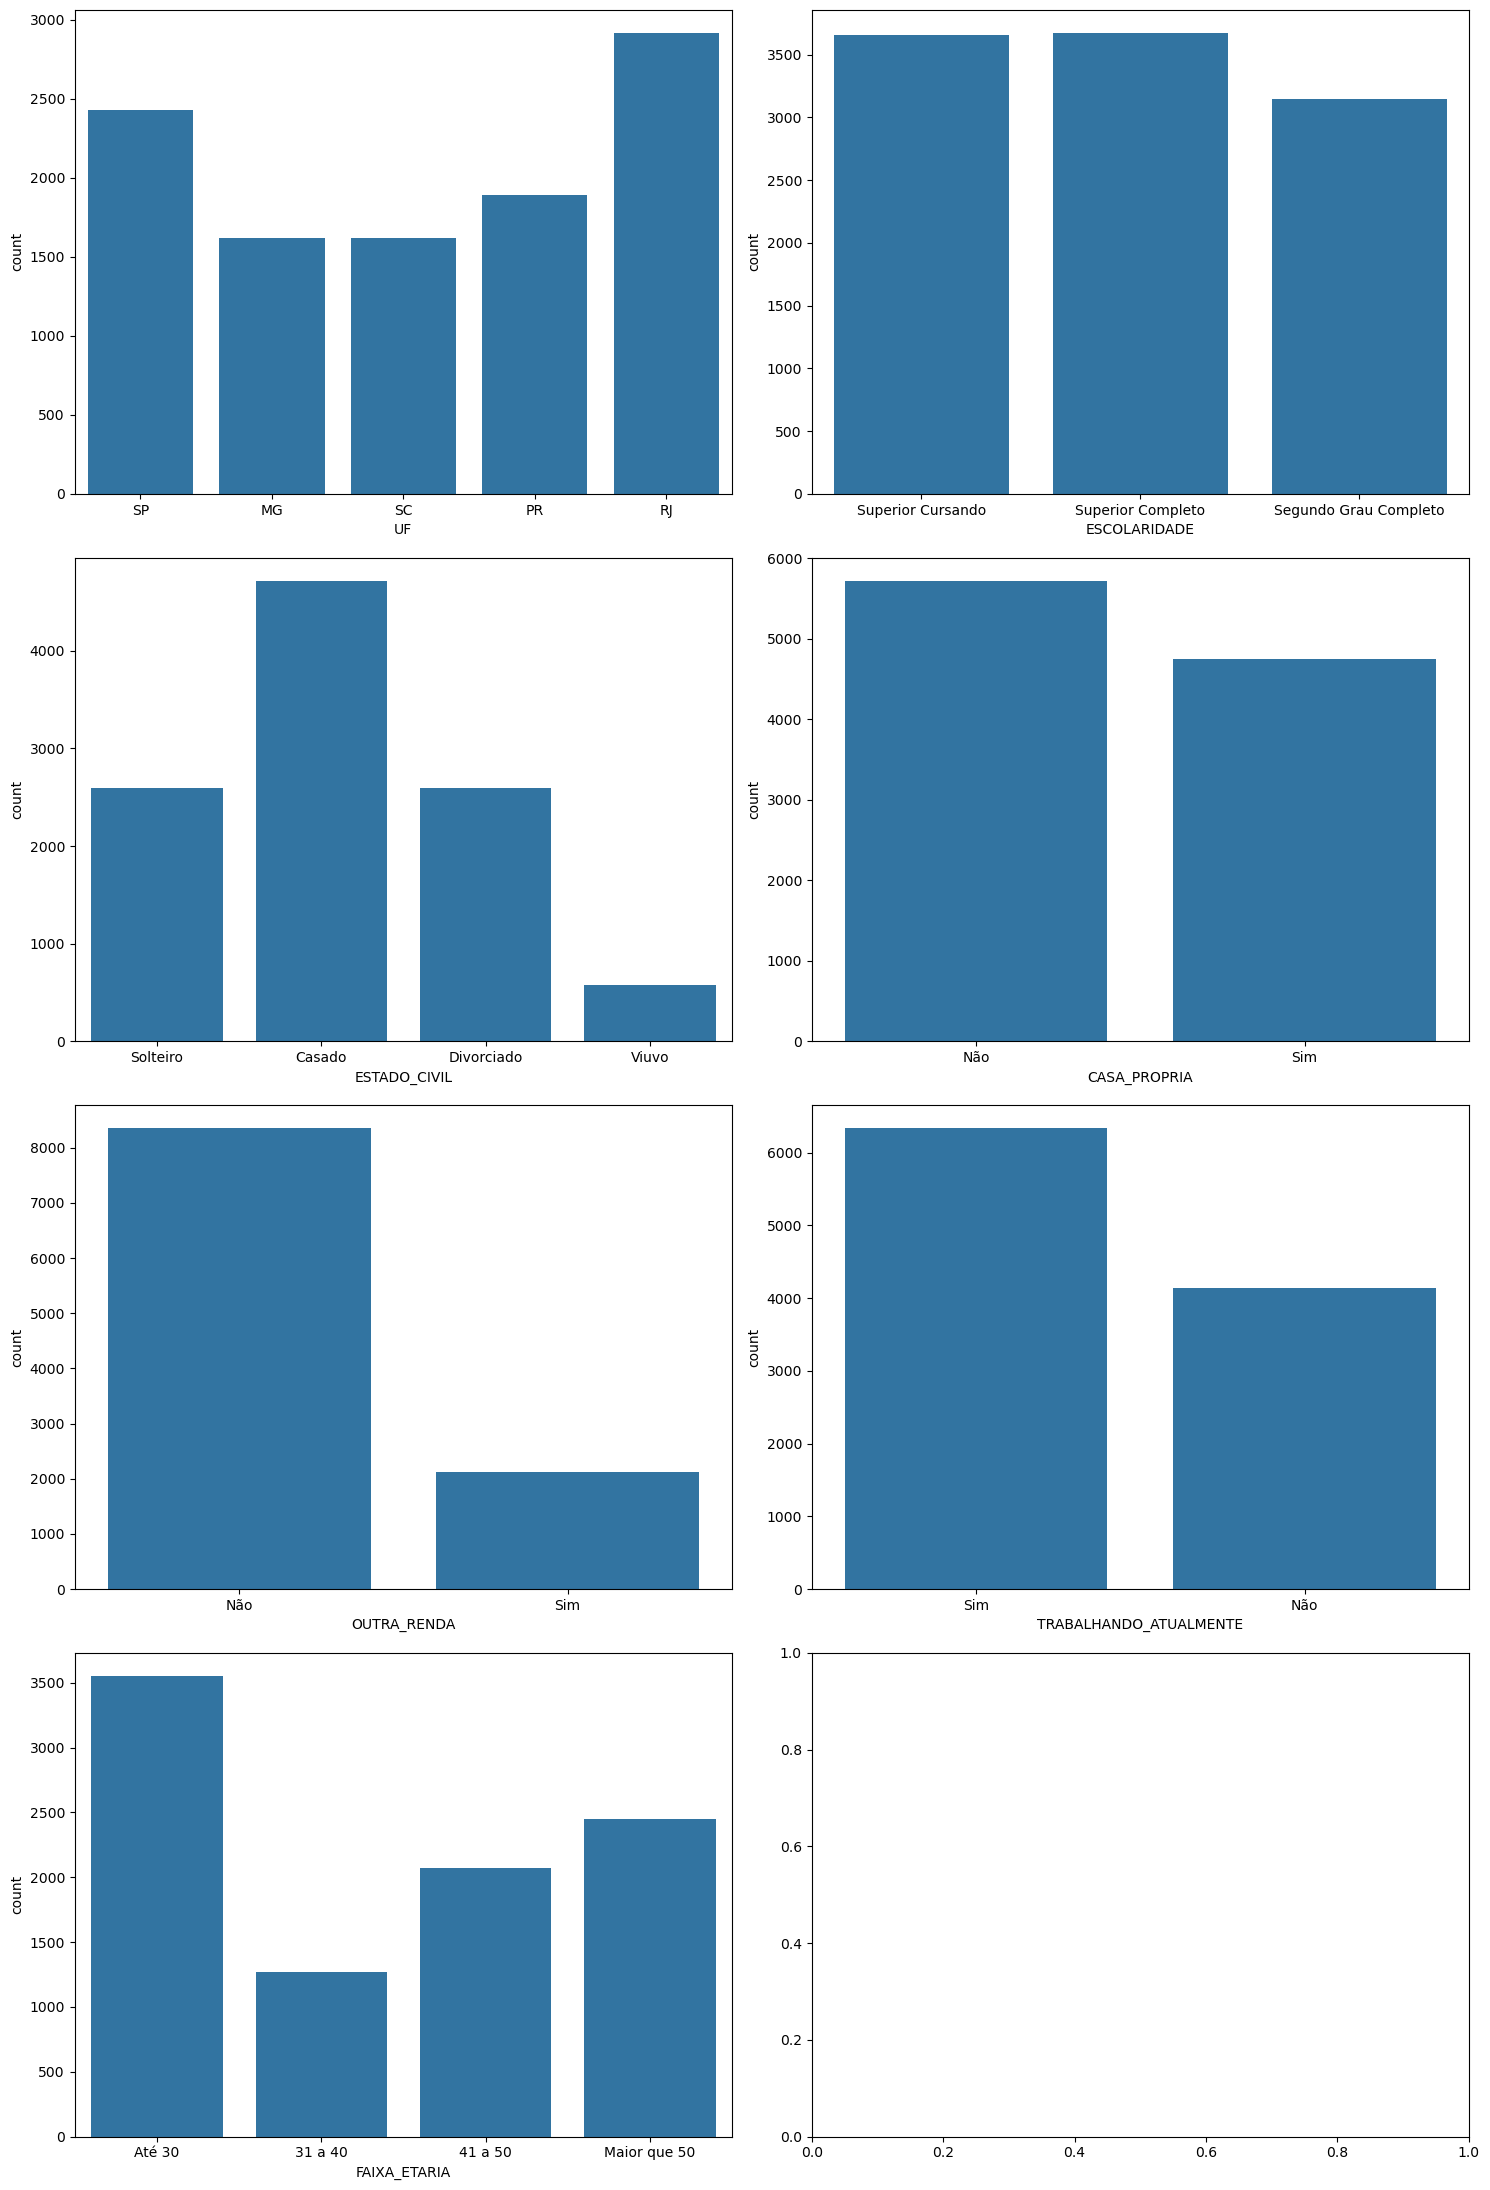

In [87]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(4, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_categoricas:    
    sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])
    
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

## Pré Processamento dos Dados

In [88]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_dados['FAIXA_ETARIA'] = lb.fit_transform(df_dados['FAIXA_ETARIA'])
df_dados['OUTRA_RENDA'] = lb.fit_transform(df_dados['OUTRA_RENDA'])
df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

# Remove valores missing eventualmente gerados
df_dados.dropna(inplace = True)

In [36]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [93]:
target = df_dados.iloc[:,15:16]

In [91]:
preditoras = df_dados.copy() #Fazendo uma cópia do dataframe

del preditoras['SCORE'] #Excluindo a variavel target, pois já separamos ela na etapa anterior

preditoras.head()#Visualizando as variaveis preditoras

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
5,4,30,0,1,0,0,0,0,0,0,14,1,3100.0,2,40000,2


In [101]:
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.5, random_state = 40)

In [102]:
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

Linear Regression - R2 Score: 0.7941
                      Variavel  Importancia
9            OUTRA_RENDA_VALOR   132.729901
12              ULTIMO_SALARIO    73.707247
10  TEMPO_ULTIMO_EMPREGO_MESES    30.837721
7                   VL_IMOVEIS    30.326552
13                   QT_CARROS    25.492225
0                           UF     3.920343
5                 CASA_PROPRIA     2.729966
1                        IDADE     2.550142
15                FAIXA_ETARIA     1.873709
2                 ESCOLARIDADE     0.465573
4                    QT_FILHOS     0.196147
3                 ESTADO_CIVIL    -1.334702
11      TRABALHANDO_ATUALMENTE    -4.055185
6                   QT_IMOVEIS   -24.312478
14         VALOR_TABELA_CARROS   -66.294645
8                  OUTRA_RENDA   -81.113002


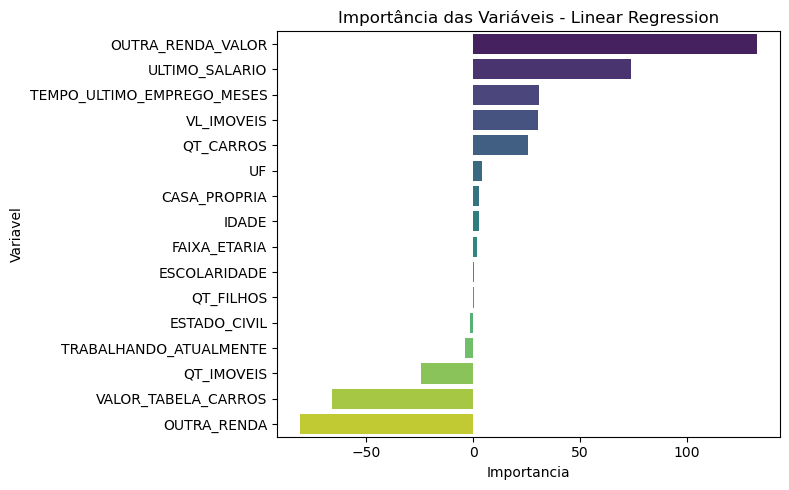

Random Forest - R2 Score: 1.0000
                      Variavel   Importancia
10  TEMPO_ULTIMO_EMPREGO_MESES  7.838490e-01
12              ULTIMO_SALARIO  1.381276e-01
7                   VL_IMOVEIS  2.835627e-02
6                   QT_IMOVEIS  2.421583e-02
14         VALOR_TABELA_CARROS  1.371270e-02
5                 CASA_PROPRIA  6.946585e-03
13                   QT_CARROS  2.008914e-03
8                  OUTRA_RENDA  1.396978e-03
9            OUTRA_RENDA_VALOR  7.183920e-04
11      TRABALHANDO_ATUALMENTE  6.677377e-04
1                        IDADE  5.432183e-15
15                FAIXA_ETARIA  2.644471e-15
0                           UF  2.054453e-15
4                    QT_FILHOS  1.535206e-15
2                 ESCOLARIDADE  1.248813e-15
3                 ESTADO_CIVIL  9.079599e-16


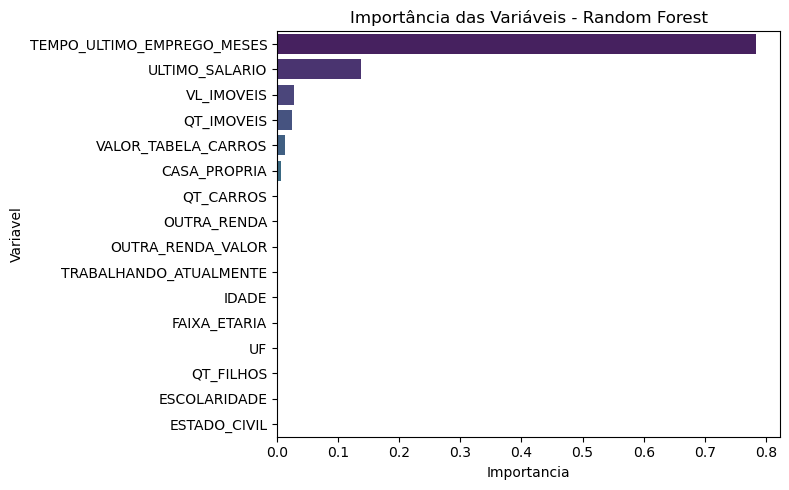

XGBoost - R2 Score: 1.0000
                      Variavel   Importancia
12              ULTIMO_SALARIO  4.634623e-01
10  TEMPO_ULTIMO_EMPREGO_MESES  4.538540e-01
6                   QT_IMOVEIS  6.271429e-02
5                 CASA_PROPRIA  1.996944e-02
11      TRABALHANDO_ATUALMENTE  1.677629e-10
7                   VL_IMOVEIS  3.220496e-11
0                           UF  0.000000e+00
1                        IDADE  0.000000e+00
2                 ESCOLARIDADE  0.000000e+00
3                 ESTADO_CIVIL  0.000000e+00
4                    QT_FILHOS  0.000000e+00
8                  OUTRA_RENDA  0.000000e+00
9            OUTRA_RENDA_VALOR  0.000000e+00
13                   QT_CARROS  0.000000e+00
14         VALOR_TABELA_CARROS  0.000000e+00
15                FAIXA_ETARIA  0.000000e+00


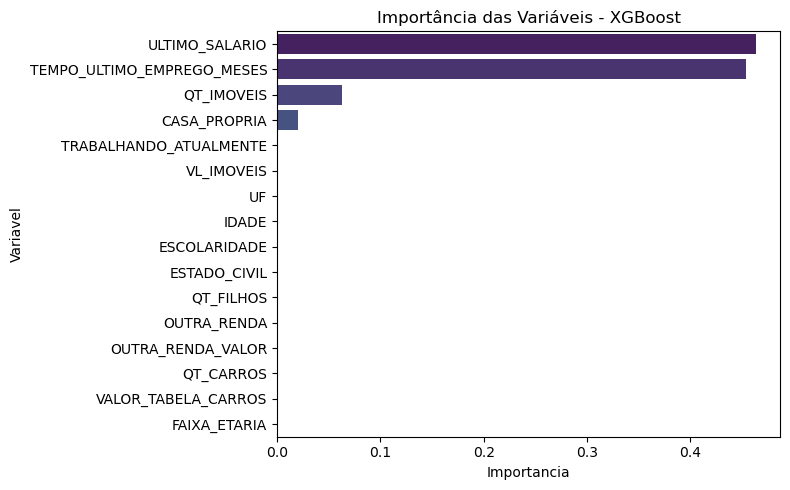

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Pipeline
for nome, modelo in modelos.items():
    modelo.fit(X_treino_normalizados, y_treino)
    y_pred = modelo.predict(X_teste_normalizados)
    score = r2_score(y_teste, y_pred)
    print(f'{nome} - R2 Score: {score:.4f}')
    
    # Variáveis mais importantes
    if nome == 'Linear Regression':
        importancias = modelo.coef_
    elif nome in ['Random Forest', 'XGBoost']:
        importancias = modelo.feature_importances_
    
    # Criação do dataframe com as importâncias
    df_importancia = pd.DataFrame({
        'Variavel': X_treino.columns,  
        'Importancia': importancias.flatten() if importancias.ndim > 1 else importancias
    }).sort_values(by='Importancia', ascending=False)
    
    print(df_importancia)

    # Plotando o gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importancia', y='Variavel', data=df_importancia, palette='viridis')
    plt.title(f'Importância das Variáveis - {nome}')
    plt.tight_layout()
    plt.show()


In [107]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(modelo, X_treino_normalizados, y_treino, cv=5, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'])
print(cv_results)

{'fit_time': array([0.12686753, 0.05697942, 0.07298326, 0.03986144, 0.06054592]), 'score_time': array([0.00615835, 0.00292587, 0.00288773, 0.00286317, 0.00758934]), 'test_r2': array([1., 1., 1., 1., 1.]), 'test_neg_mean_absolute_error': array([-2.25563389e-05, -2.35719386e-05, -2.32036461e-05, -2.47809584e-05,
       -2.55151146e-05]), 'test_neg_root_mean_squared_error': array([-2.72145558e-05, -2.80496987e-05, -2.84374720e-05, -3.04534023e-05,
       -2.95526987e-05])}


In [108]:
r2_mean = np.mean(cv_results['test_r2'])
r2_std = np.std(cv_results['test_r2'])
print(f'R2: {r2_mean:.4f} ± {r2_std:.4f}')

# Exemplo para MAE (note que vem negativo)
mae_mean = -np.mean(cv_results['test_neg_mean_absolute_error'])
mae_std = np.std(cv_results['test_neg_mean_absolute_error'])
print(f'MAE: {mae_mean:.4f} ± {mae_std:.4f}')

# Exemplo para RMSE
rmse_mean = -np.mean(cv_results['test_neg_root_mean_squared_error'])
rmse_std = np.std(cv_results['test_neg_root_mean_squared_error'])
print(f'RMSE: {rmse_mean:.4f} ± {rmse_std:.4f}')

R2: 1.0000 ± 0.0000
MAE: 0.0000 ± 0.0000
RMSE: 0.0000 ± 0.0000


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for nome, modelo in modelos.items():
    # Treinar o modelo
    modelo.fit(X_treino_normalizados, y_treino)

    # Predições no conjunto de treino e teste
    y_pred_treino = modelo.predict(X_treino_normalizados)
    y_pred_teste = modelo.predict(X_teste_normalizados)

    # R2 Score no treino e teste
    r2_treino = r2_score(y_treino, y_pred_treino)
    r2_teste = r2_score(y_teste, y_pred_teste)

    print(f'{nome} - R2 Score (Treino): {r2_treino:.4f}')
    print(f'{nome} - R2 Score (Teste): {r2_teste:.4f}')


Linear Regression - R2 Score (Treino): 0.7957
Linear Regression - R2 Score (Teste): 0.7941
Random Forest - R2 Score (Treino): 1.0000
Random Forest - R2 Score (Teste): 1.0000
XGBoost - R2 Score (Treino): 1.0000
XGBoost - R2 Score (Teste): 1.0000


In [111]:
from sklearn.model_selection import cross_val_score

for nome, modelo in modelos.items():
    cv_r2 = cross_val_score(modelo, X_treino_normalizados, y_treino, cv=5, scoring='r2')
    print(f'{nome} - R2 (Cross-validation): {cv_r2.mean():.4f} ± {cv_r2.std():.4f}')


Linear Regression - R2 (Cross-validation): 0.7938 ± 0.0197
Random Forest - R2 (Cross-validation): 1.0000 ± 0.0000
XGBoost - R2 (Cross-validation): 1.0000 ± 0.0000


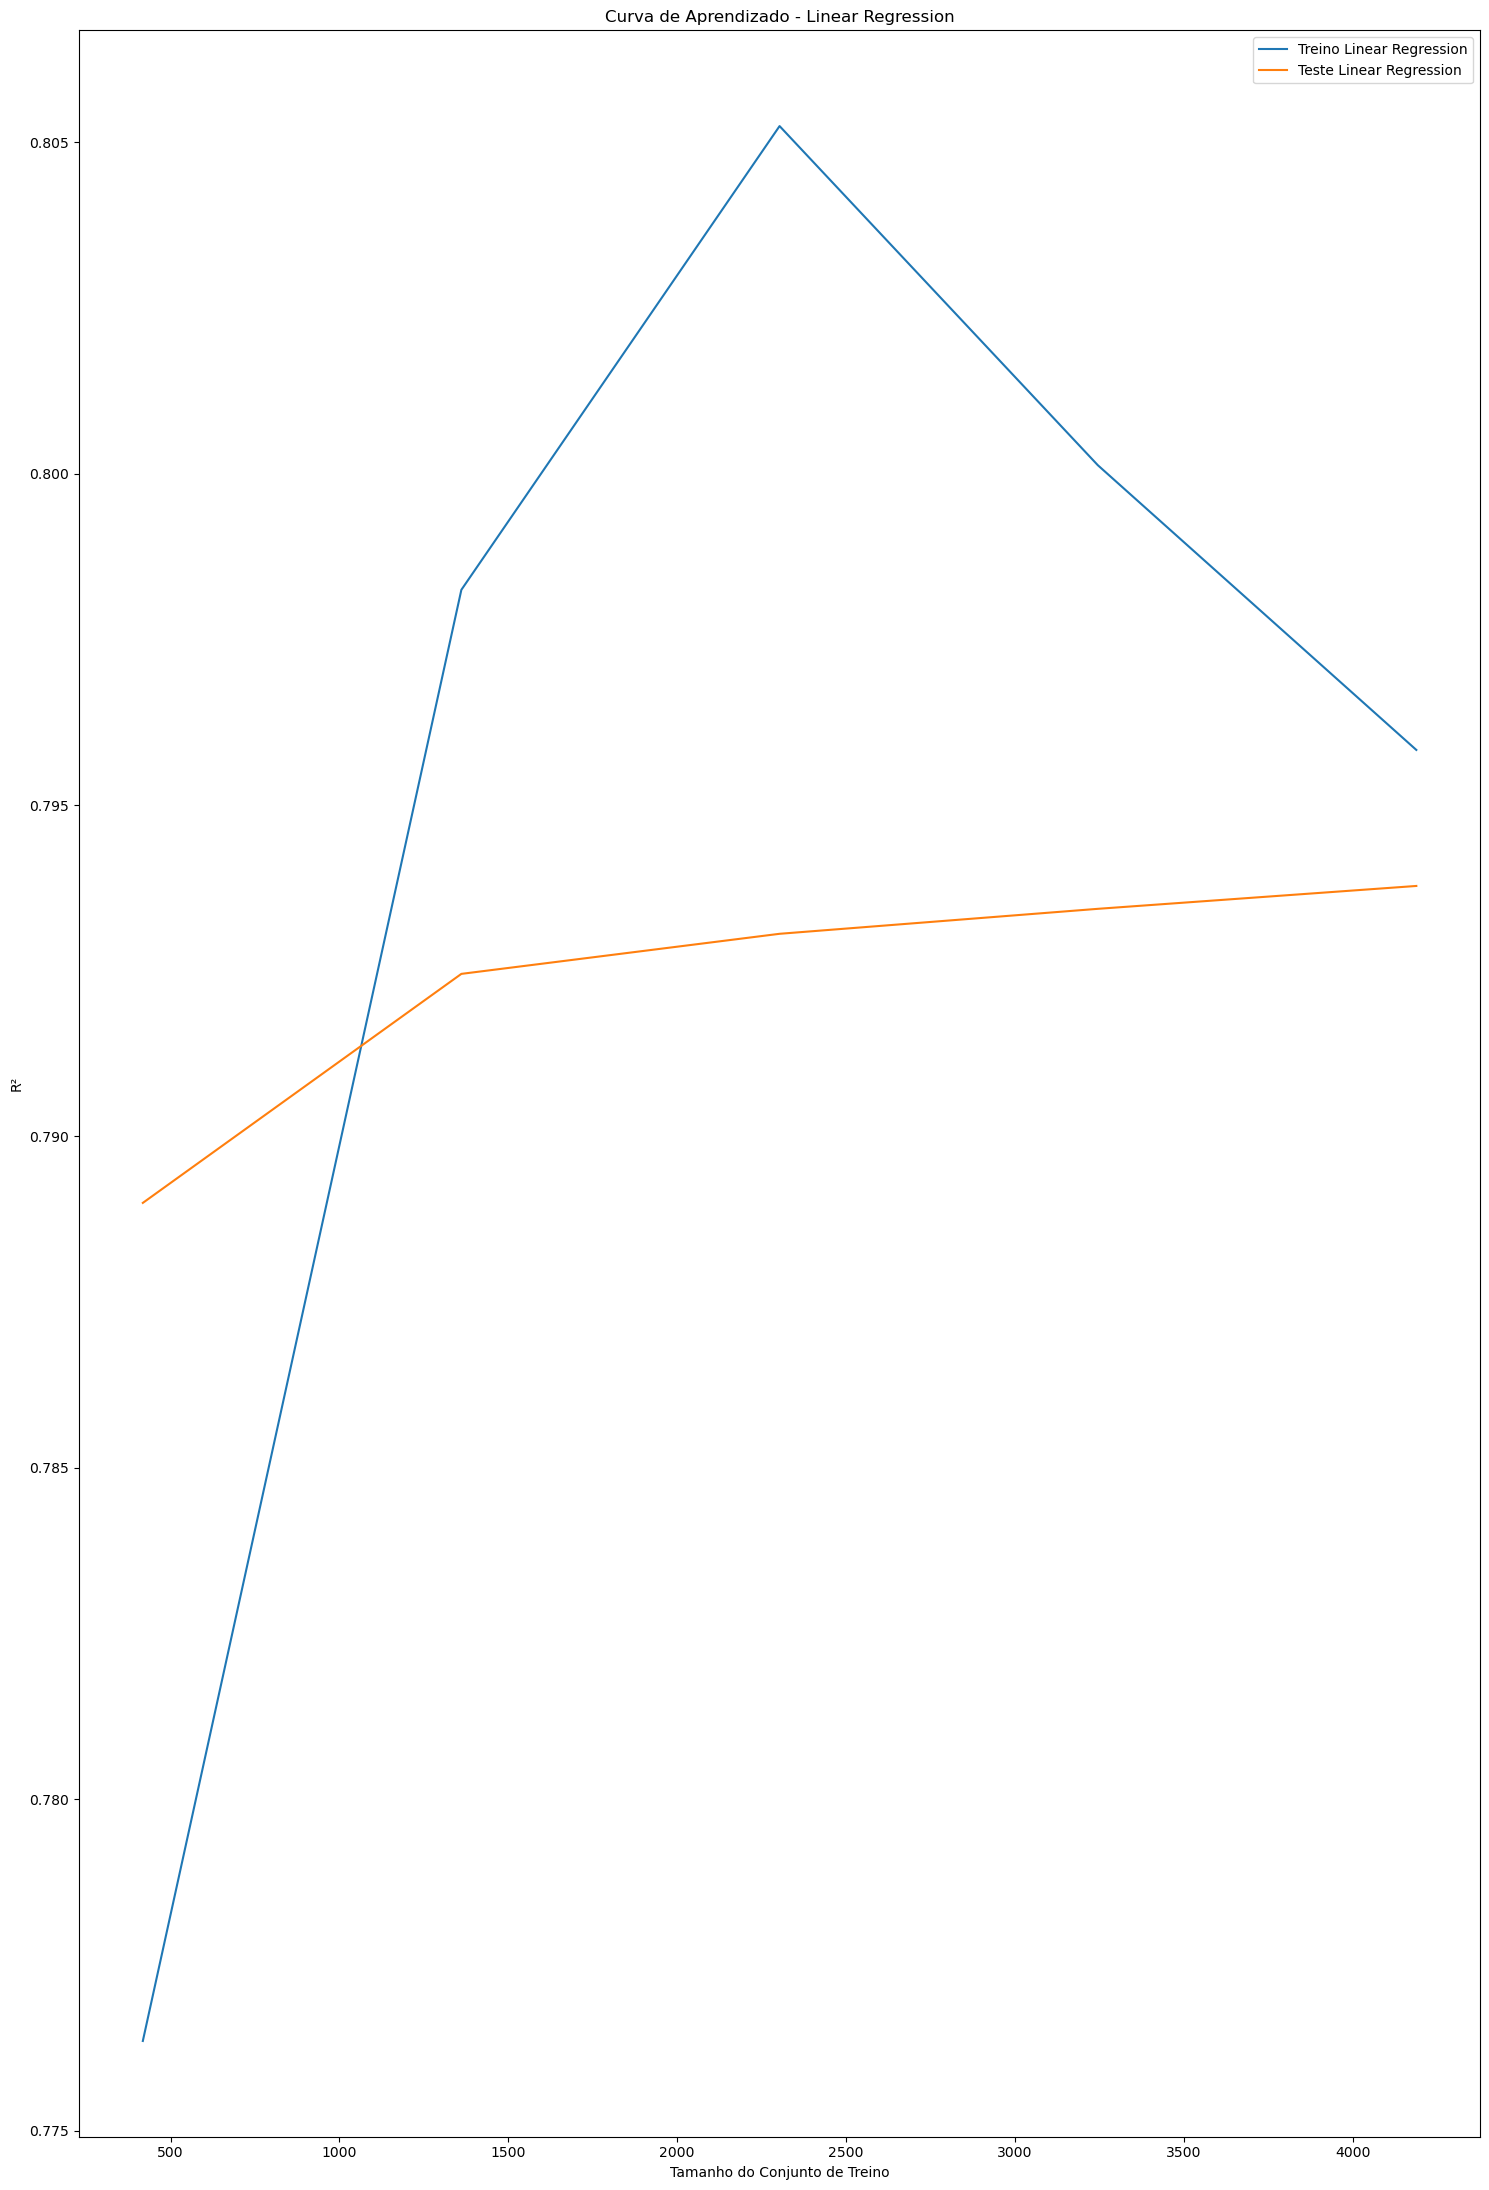

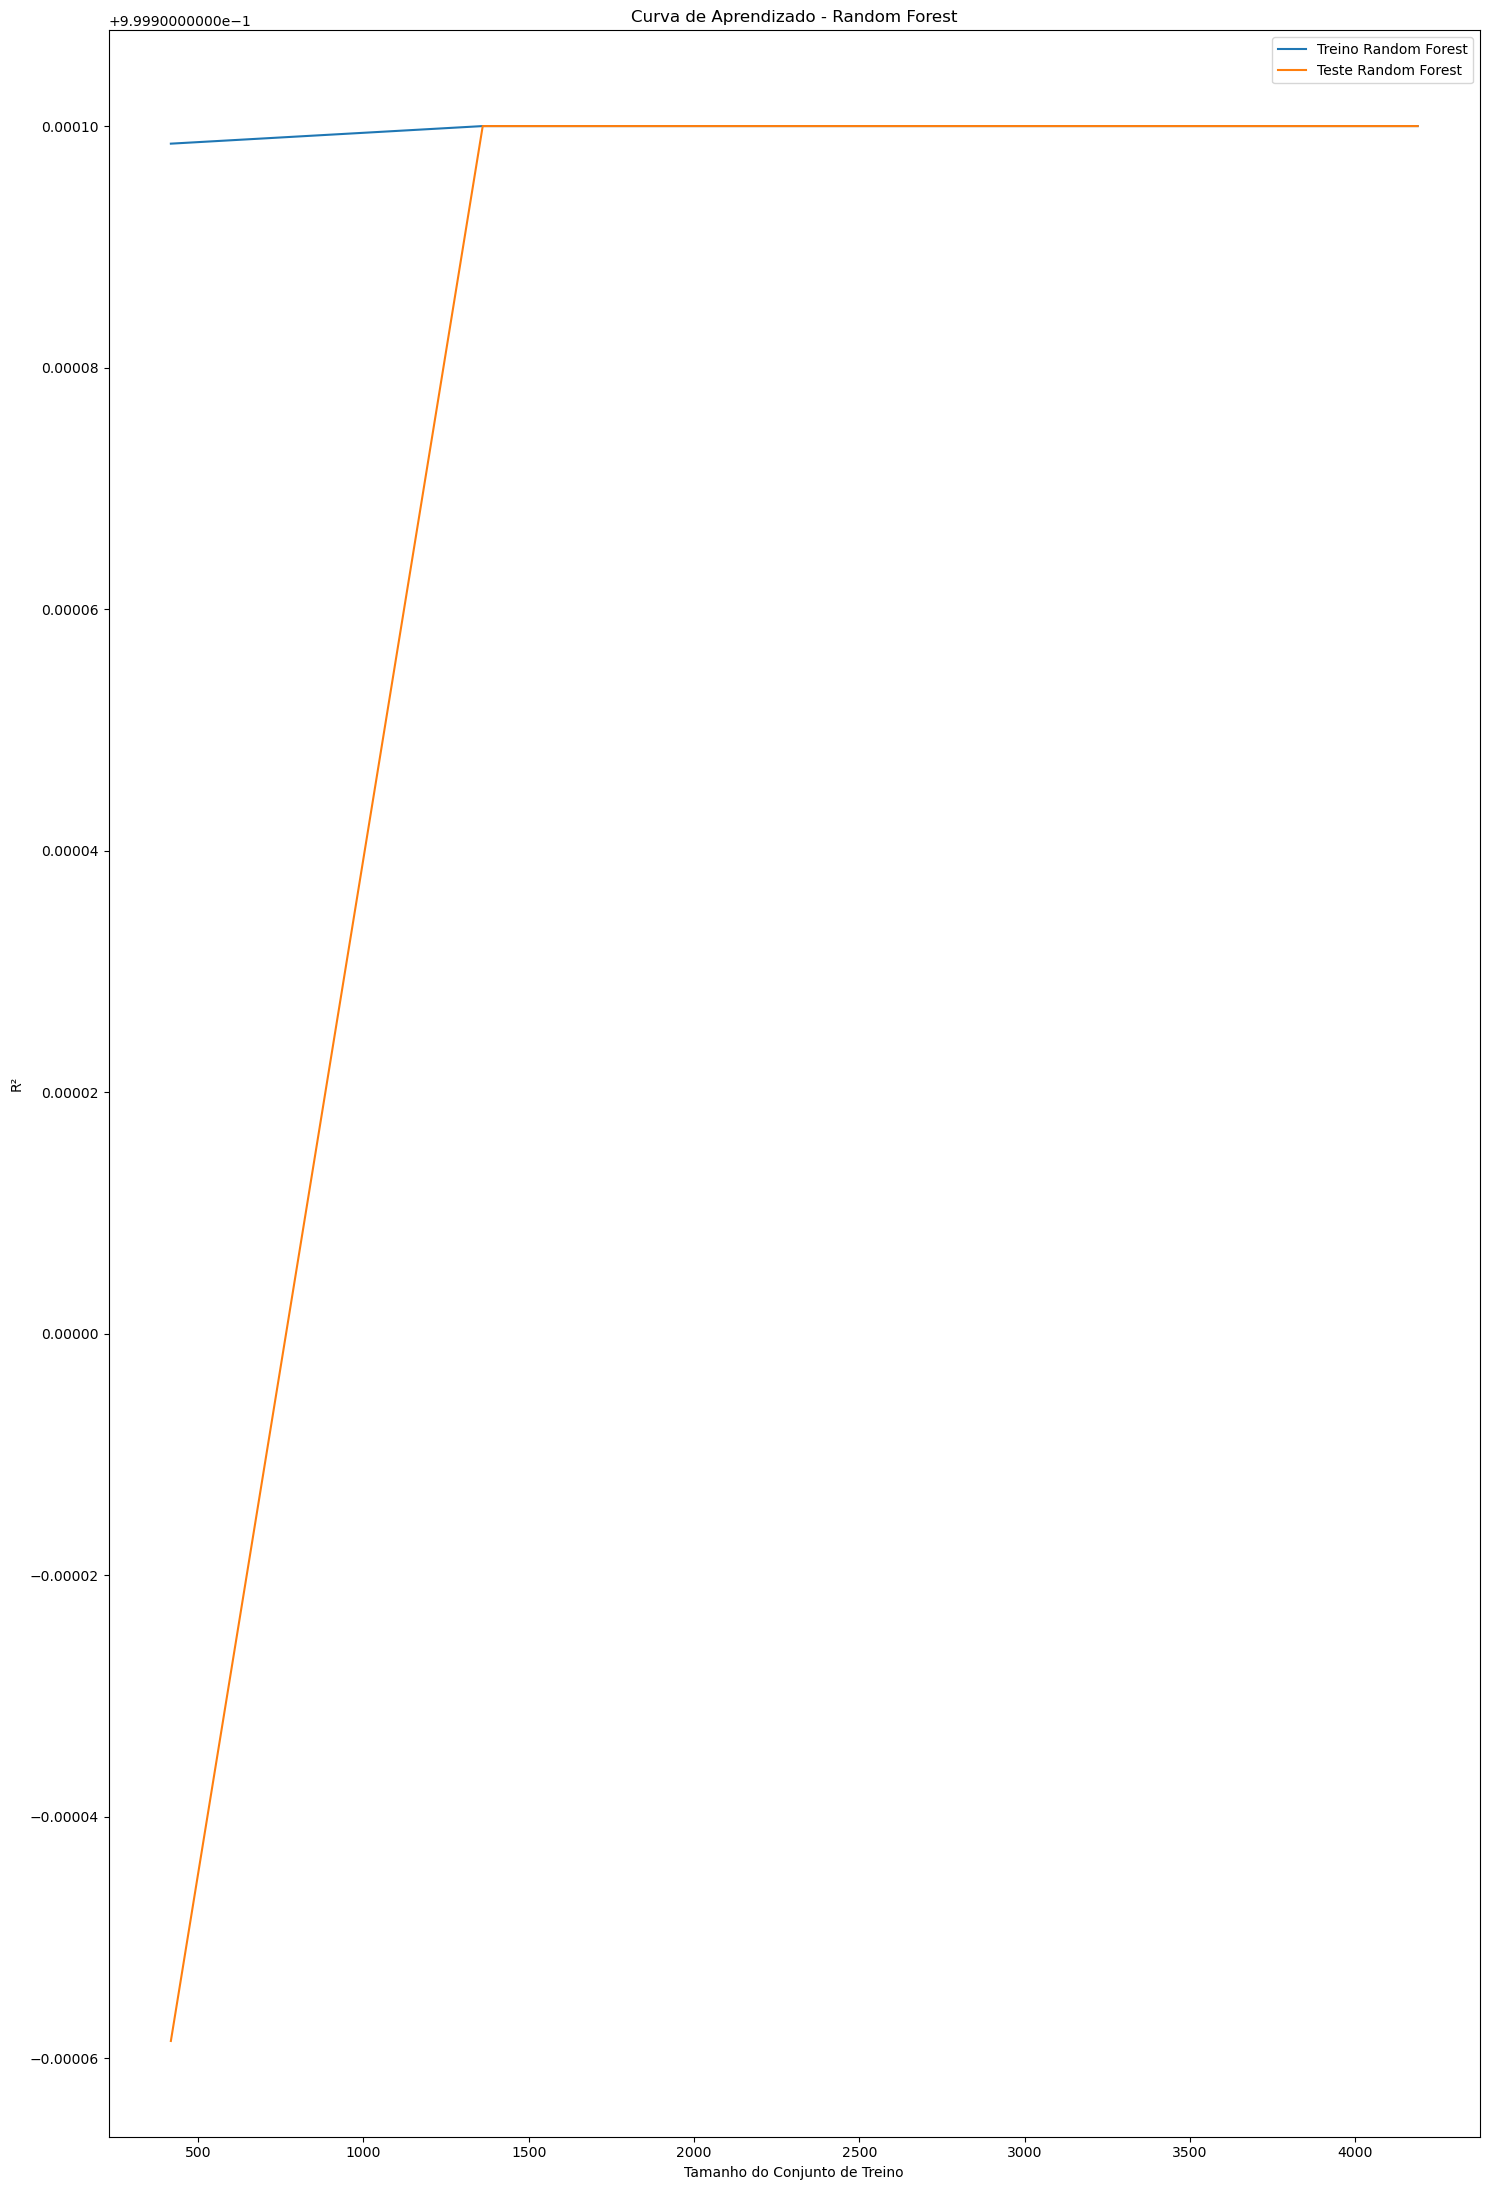

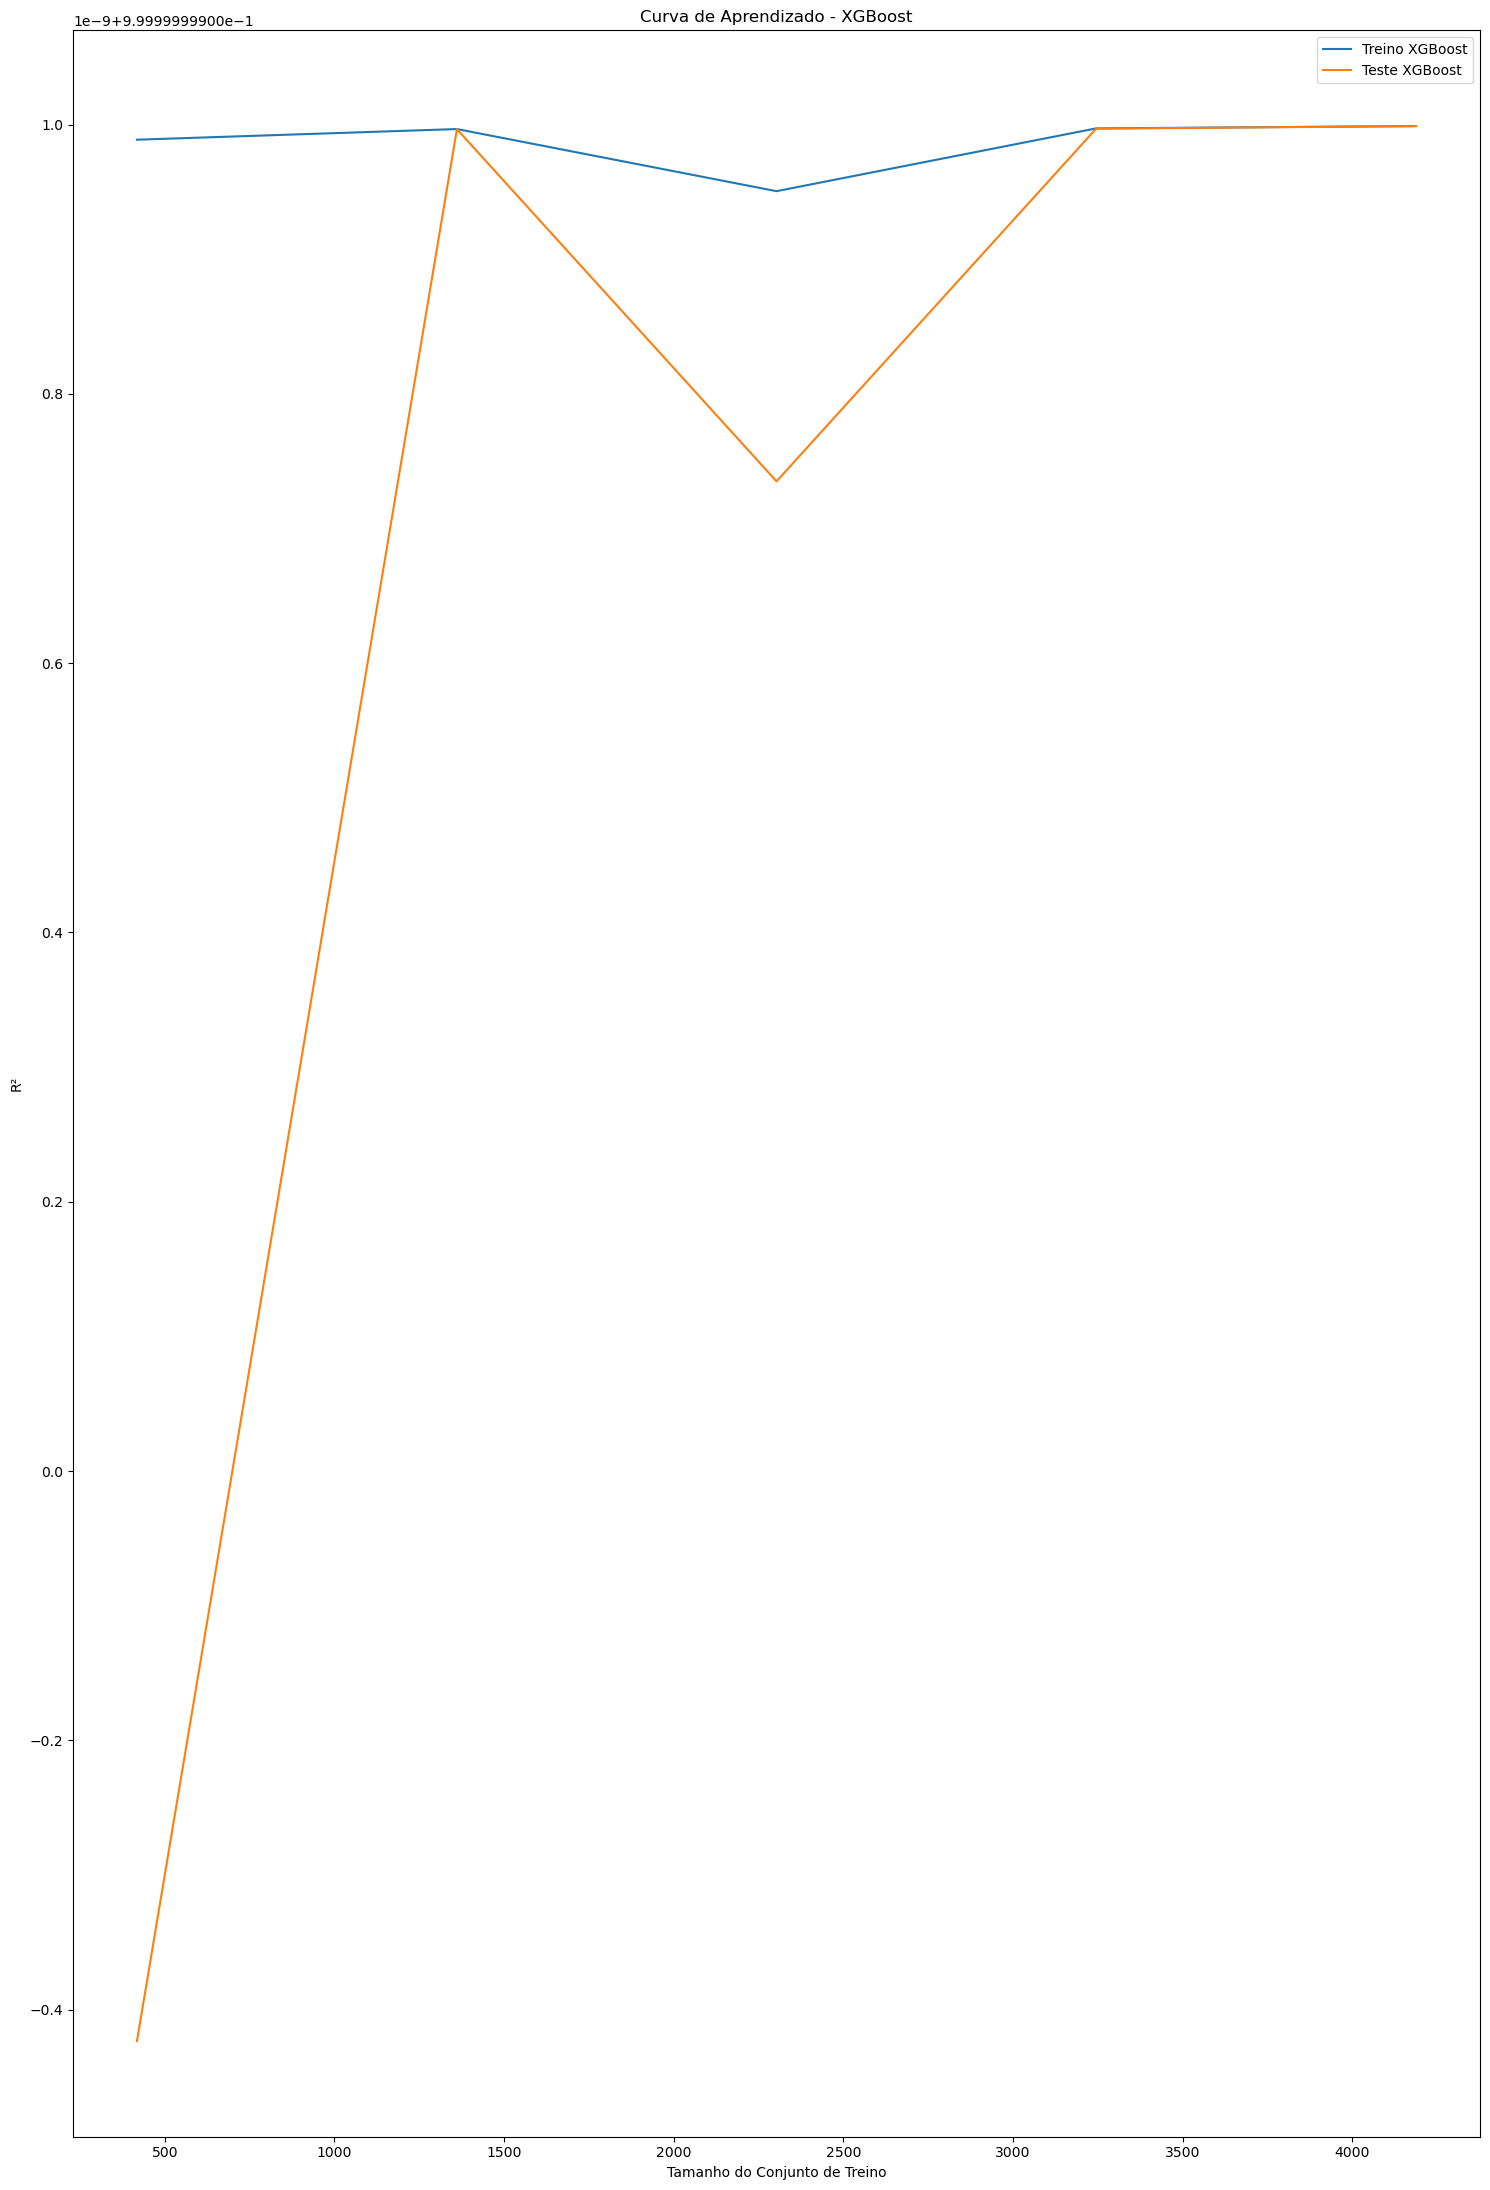

In [112]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

for nome, modelo in modelos.items():
    train_sizes, train_scores, test_scores = learning_curve(modelo, X_treino_normalizados, y_treino, cv=5)
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'Treino {nome}')
    plt.plot(train_sizes, test_scores_mean, label=f'Teste {nome}')
    
    plt.title(f'Curva de Aprendizado - {nome}')
    plt.xlabel('Tamanho do Conjunto de Treino')
    plt.ylabel('R²')
    plt.legend()
    plt.show()


In [84]:
UF = 4
IDADE = 29 
ESCOLARIDADE = 1
ESTADO_CIVIL = 0
QT_FILHOS = 0
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 400000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000 
TEMPO_ULTIMO_EMPREGO_MESES = 60
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 25000
QT_CARROS = 1
VALOR_TABELA_CARROS = 60000
FAIXA_ETARIA = 2

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print("Score de crédito previsto para esse cliente:", modelo.predict(X))

Score de crédito previsto para esse cliente: [45.166695]
